## **데이터 불러오기**

In [11]:
import pandas as pd
url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv'
df = pd.read_csv(url)
df

Unnamed: 0  ... Other_Sales
0               1  ...           0
1               2  ...        0.01
2               3  ...           0
3               4  ...           0
4               5  ...        0.04
...           ...  ...         ...
16593       16594  ...        0.01
16594       16595  ...           0
16595       16596  ...        0.13
16596       16597  ...        0.03
16597       16598  ...        0.01

[16598 rows x 10 columns]

In [12]:
df = df.fillna(0)
df.isnull().sum()
df.drop(columns='Unnamed: 0',inplace = True)

In [3]:
df

Name  ... Other_Sales
0                        Candace Kane's Candy Factory  ...           0
1                                      The Munchables  ...        0.01
2      Otome wa Oanesama Boku ni Koi Shiteru Portable  ...           0
3                    Deal or No Deal: Special Edition  ...           0
4           Ben 10 Ultimate Alien: Cosmic Destruction  ...        0.04
...                                               ...  ...         ...
16593                         Ice Age 2: The Meltdown  ...        0.01
16594                     Rainbow Islands: Revolution  ...           0
16595                                        NBA 2K16  ...        0.13
16596                     Toukiden: The Age of Demons  ...        0.03
16597                        The King of Fighters '95  ...        0.01

[16598 rows x 9 columns]

## **데이터 전처리(지역값 단위 통일)**

단위 : 만

Type : Float

In [4]:
country_sales = df.iloc[:,5:]
country_sales

NA_Sales EU_Sales JP_Sales Other_Sales
0         0.04        0        0           0
1         0.17        0        0        0.01
2            0        0     0.02           0
3         0.04        0        0           0
4         0.12     0.09        0        0.04
...        ...      ...      ...         ...
16593     0.15     0.04        0        0.01
16594     0.01        0        0           0
16595     0.44     0.19     0.03        0.13
16596     0.05     0.05     0.25        0.03
16597        0        0     0.16        0.01

[16598 rows x 4 columns]

In [5]:
lst = []
def toFloat(column) :
  for i in range(len(column)) :
    data = column[i].lower()
    if data.find('k') != -1 : 
      column[i] = float(data.rstrip('k')) * 0.001
    elif data.find('m') != -1 :
      column[i] = data.rstrip('m')
  return column.astype(float)

def toCount(data) :
  return data*100
country_sales = (country_sales
                 .apply(toFloat)
                 .apply(toCount)
                 .astype(int)
)

In [6]:
country_sales

NA_Sales  EU_Sales  JP_Sales  Other_Sales
0             4         0         0            0
1            17         0         0            1
2             0         0         2            0
3             4         0         0            0
4            12         9         0            4
...         ...       ...       ...          ...
16593        15         4         0            1
16594         1         0         0            0
16595        44        19         3           13
16596         5         5        25            3
16597         0         0        16            1

[16598 rows x 4 columns]

In [7]:
country_sales.dtypes

NA_Sales       int64
EU_Sales       int64
JP_Sales       int64
Other_Sales    int64
dtype: object

## **데이터 전처리(연도)**

In [ ]:
year = df['Year']
def reset_year(data) :
  if data < 1000 :
    if data == 0 : data
    elif data < 21 : data += 2000
    elif data < 100 : data += 1900
  return int(data)
year = year.apply(reset_year)

## **데이터 합치기(전처리 데이터들 종합)**

In [ ]:
df['Year'] = year
df = df.drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],axis=1)
df = pd.concat([df, country_sales], axis=1)
df

Name  ... Other_Sales
0                        Candace Kane's Candy Factory  ...           0
1                                      The Munchables  ...           1
2      Otome wa Oanesama Boku ni Koi Shiteru Portable  ...           0
3                    Deal or No Deal: Special Edition  ...           0
4           Ben 10 Ultimate Alien: Cosmic Destruction  ...           4
...                                               ...  ...         ...
16593                         Ice Age 2: The Meltdown  ...           1
16594                     Rainbow Islands: Revolution  ...           0
16595                                        NBA 2K16  ...          13
16596                     Toukiden: The Age of Demons  ...           3
16597                        The King of Fighters '95  ...           1

[16598 rows x 9 columns]

## **지역에 따라서 선호하는 게임 장르가 다를까 ==> 장르와 지역은 상관이 없다**

In [ ]:
df_groupby_Genre  = (df
                     .loc[:, ['Genre', 'NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
                     .groupby(by=['Genre'])
                     .sum()
                     .dropna()
)
df_groupby_Genre = df_groupby_Genre[1:].T
df_groupby_Genre

Genre        Action  Adventure  Fighting  ...  Simulation  Sports  Strategy
NA_Sales      87418      10560     22307  ...       18291   68014      6865
EU_Sales      52182       6405     10112  ...       11330   37628      4529
JP_Sales      15778       5192      8732  ...        6369   13523      4938
Other_Sales   18633       1680      3661  ...        3145   13463      1136

[4 rows x 12 columns]

In [ ]:
from scipy.stats import chi2_contingency
df_Relation_GenreCountry = chi2_contingency(df_groupby_Genre, correction = False)
df_Relation_GenreCountry

(69642.67327891082,
 0.0,
 33,
 array([[85838.43652972, 11758.62911861, 22105.45320566, 39429.41578553,
         40941.35932912, 12005.76899311, 35884.61111857, 44618.36656368,
         51073.60089041, 19305.02792117, 65424.48557886,  8616.84496555],
        [47526.97302139,  6510.51057641, 12239.33380668, 21831.25480902,
         22668.38678522,  6647.34683092, 19868.56952975, 24704.26990124,
         28278.40009392, 10688.79604848, 36224.18914828,  4770.9694487 ],
        [25091.81550469,  3437.21722296,  6461.74343229, 11525.78805423,
         11967.7510021 ,  3509.45977986, 10489.5904218 , 13042.59335559,
         14929.55163808,  5643.13865087, 19124.52262647,  2518.82831106],
        [15553.77494421,  2130.64308202,  4005.46955537,  7144.54135121,
          7418.50288355,  2175.42439611,  6502.22892987,  8084.77017949,
          9254.4473776 ,  3498.03737949, 11854.80264639,  1561.35727469]]))

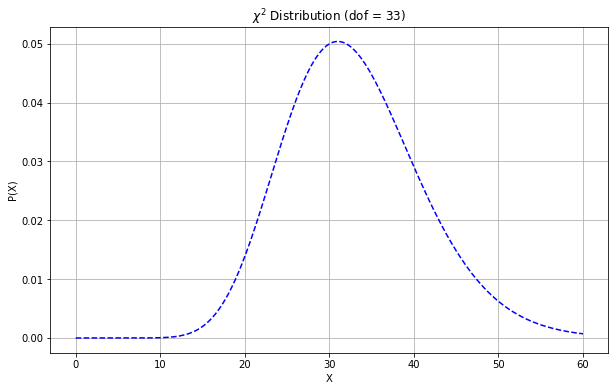

In [ ]:
from numpy import linspace
from scipy.stats import chi2
import matplotlib.pyplot as plt

dof = 33         # 자유도
x = linspace(0, 60, 201)
y = chi2(dof).pdf(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b--')
plt.xlabel('X')
plt.ylabel('P(X)')
plt.grid()
plt.title(r'$\chi^2$ Distribution (dof = 33)')
plt.show()

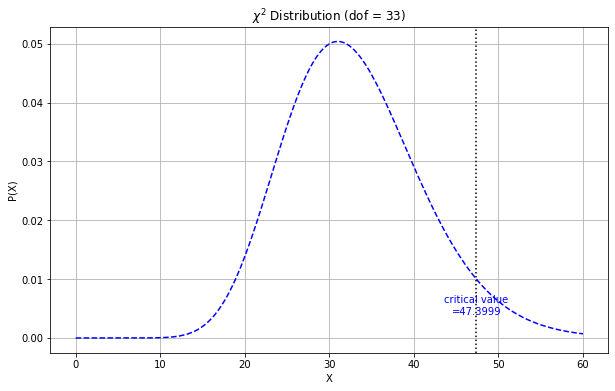

In [ ]:
x95 = chi2(dof).ppf(.95)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b--')

plt.axvline(x=x95, color='black', linestyle=':')
plt.text(x95, .004, 'critical value\n=' + str(round(x95, 4)), 
         horizontalalignment='center', color='b')

plt.xlabel('X')
plt.ylabel('P(X)')
plt.grid()
plt.title(r'$\chi^2$ Distribution (dof = 33)')
plt.show()

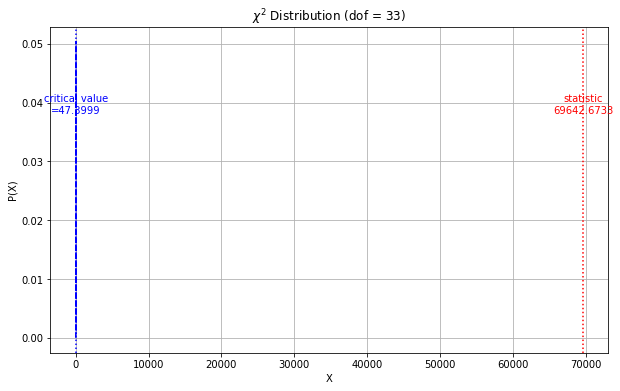

In [ ]:
dof = 33          # 자유도
x = linspace(0, 60, 201)
y = chi2(dof).pdf(x)

x95 = chi2(dof).ppf(.95)
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b--')

plt.axvline(x=x95, color='b', linestyle=':')
plt.text(x95, 0.04, 'critical value\n=' + str(round(x95, 4)),va = 'center_baseline', ha='center', color='b')
plt.axvline(x=df_Relation_GenreCountry[0], color='r', linestyle=':')
plt.text(df_Relation_GenreCountry[0], 0.04, 'statistic\n' + str(round(df_Relation_GenreCountry[0], 4)),va = 'center_baseline', ha='center', color='r')

plt.xlabel('X')
plt.ylabel('P(X)')
plt.grid()
plt.title(r'$\chi^2$ Distribution (dof = 33)')
plt.show()  

## **연도별 게임의 트렌드가 있을까**

In [ ]:
df_TotalPerYear = (df
                    .drop(df[ df['Genre'] == 0 ].index) #결측치 제거
                    .drop(df[ df['Year'] == 0 ].index) #결측치 제거
                    .loc[:, ['Genre', 'Year', 'NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
                    .groupby(by=['Genre','Year'])
                    .sum()
)
df_TotalPerYear["Total_Sales"] = df_TotalPerYear.sum(axis=1)
df_TotalPerYear.head()

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Total_Sales
Genre  Year                                                        
Action 1980        32         2         0            0           34
       1981      1385        81         0           12         1478
       1982       604        38         0            5          647
       1983       267        17         0            2          286
       1984        80        19        83            3          185

In [ ]:
temp = df_TotalPerYear.pivot_table(values="Total_Sales",index="Year",columns="Genre").fillna(0).astype(int)
temp.head()

Genre  Action  Adventure  Fighting  Misc  ...  Shooter  Simulation  Sports  Strategy
Year                                      ...                                       
1980       34          0        77   270  ...      707           0       0         0
1981     1478          0         0     0  ...     1002          44      78         0
1982      647          0         0    87  ...      380           0     106         0
1983      286         40         0   214  ...       49           0     320         0
1984      185          0         0   145  ...     3110           0     617         0

[5 rows x 12 columns]

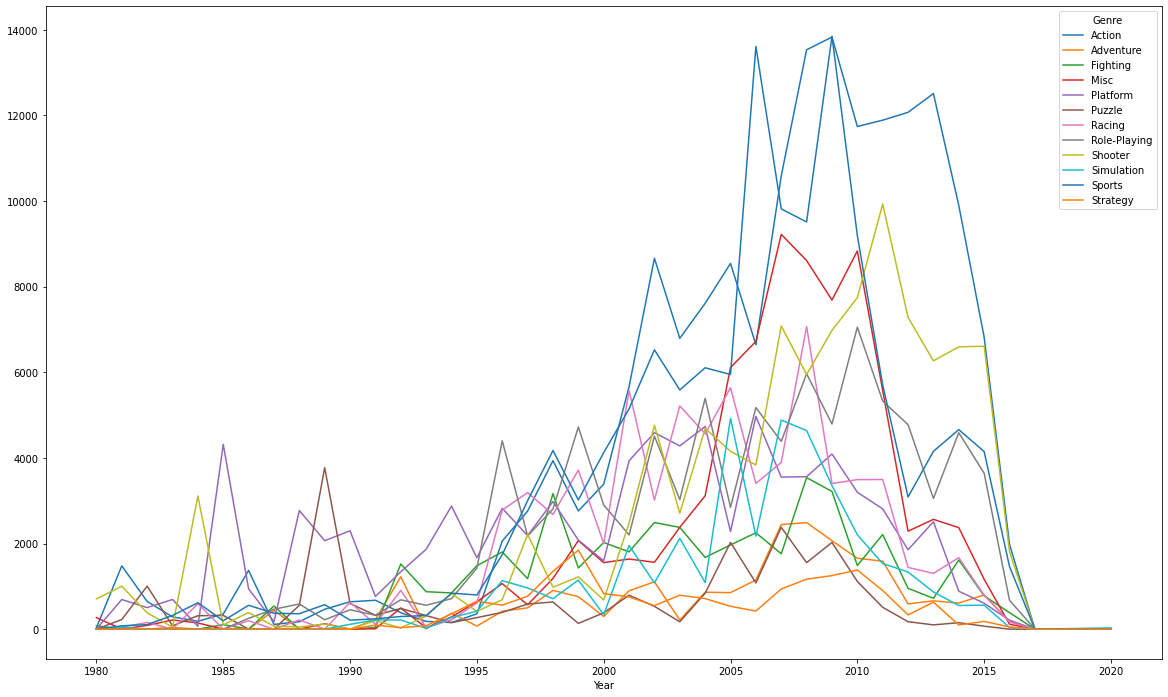

In [ ]:
import matplotlib.pylab as plt
temp = df_TotalPerYear.pivot_table(values="Total_Sales",index="Year",columns="Genre").fillna(0).astype(int)
plt.rcParams["figure.figsize"] = (20,12)
ax = temp.plot()

In [ ]:
temp['TotalSales'] = temp.sum(axis=1)
temp.head()

Genre  Action  Adventure  Fighting  ...  Sports  Strategy  TotalSales
Year                                ...                              
1980       34          0        77  ...       0         0        1088
1981     1478          0         0  ...      78         0        3567
1982      647          0         0  ...     106         0        2884
1983      286         40         0  ...     320         0        1680
1984      185          0         0  ...     617         0        5035

[5 rows x 13 columns]

In [ ]:
temp = (temp
        .apply(lambda x: round(x[:]/x['TotalSales']*100,3), axis=1)
        .astype(float)
        .drop(columns = 'TotalSales')
)
temp.head()

Genre  Action  Adventure  Fighting  ...  Simulation  Sports  Strategy
Year                                ...                              
1980    3.125      0.000     7.077  ...       0.000   0.000       0.0
1981   41.435      0.000     0.000  ...       1.234   2.187       0.0
1982   22.434      0.000     0.000  ...       0.000   3.675       0.0
1983   17.024      2.381     0.000  ...       0.000  19.048       0.0
1984    3.674      0.000     0.000  ...       0.000  12.254       0.0

[5 rows x 12 columns]

In [ ]:
!pip install --upgrade matplotlib

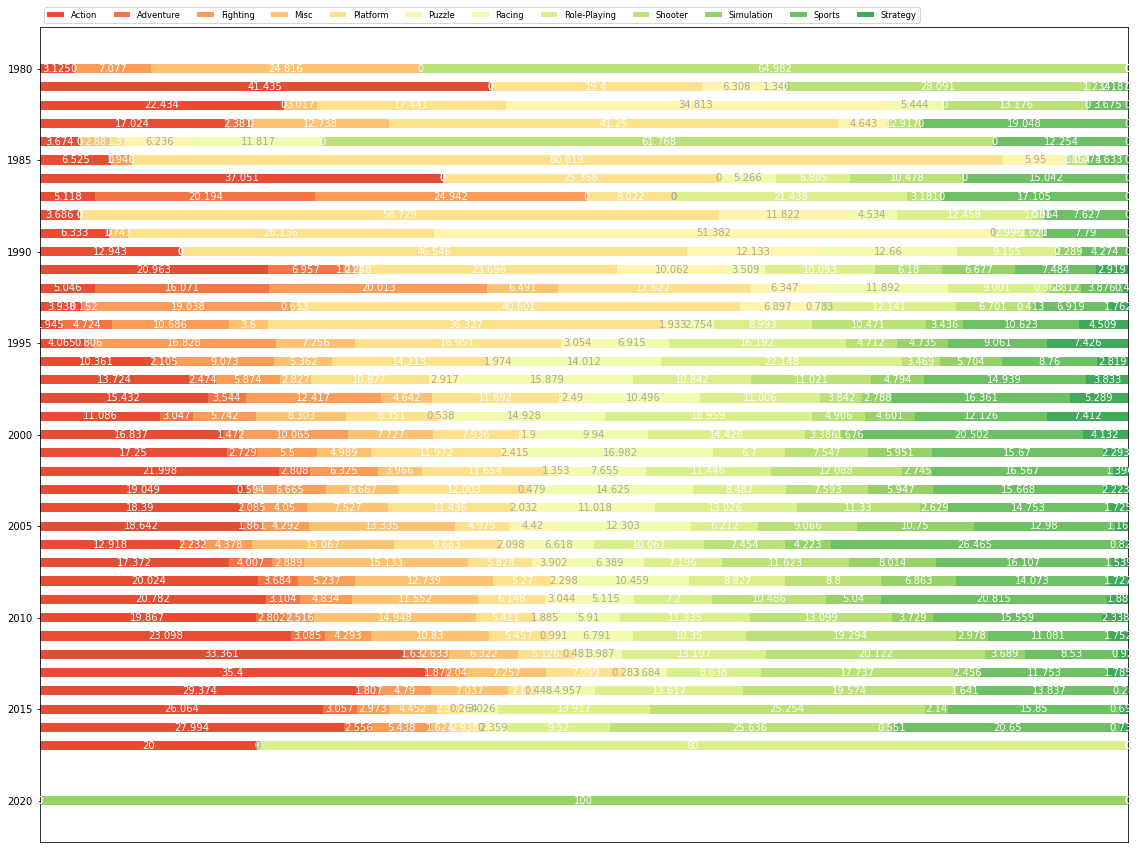

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

idx = temp.to_dict('split')
category_names = idx['columns']
results = dict(zip(idx['index'], idx['data']))

def survey(results, category_names):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(19.5, 15))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()

In [ ]:
temp['Action'].T.reset_index().head()

Year  Action
0  1980   3.125
1  1981  41.435
2  1982  22.434
3  1983  17.024
4  1984   3.674

## **출고량이 높은 게임에 대한 분석 및 시각화 프로세스**




In [ ]:
df['Total_Sales']=df.loc[:,'NA_Sales':'Other_Sales'].sum(axis=1)
df.head()

Name  ... Total_Sales
0                    Candace Kane's Candy Factory  ...           4
1                                  The Munchables  ...          18
2  Otome wa Oanesama Boku ni Koi Shiteru Portable  ...           2
3                Deal or No Deal: Special Edition  ...           4
4       Ben 10 Ultimate Alien: Cosmic Destruction  ...          25

[5 rows x 10 columns]

In [ ]:
df_sorted = df.sort_values(by=['Total_Sales'],axis=0,ascending=False)
df_sorted.reset_index(inplace=True,drop=True)
df_sorted=df_sorted.loc[:99,:]
df_sorted.head()

Name Platform  Year  ... JP_Sales Other_Sales  Total_Sales
0                Wii Sports      Wii  2006  ...      377         846         8274
1         Super Mario Bros.      NES  1985  ...      681          77         4024
2            Mario Kart Wii      Wii  2008  ...      379         331         3583
3         Wii Sports Resort      Wii  2009  ...      328         296         3300
4  Pokemon Red/Pokemon Blue       GB  1996  ...     1022         100         3138

[5 rows x 10 columns]

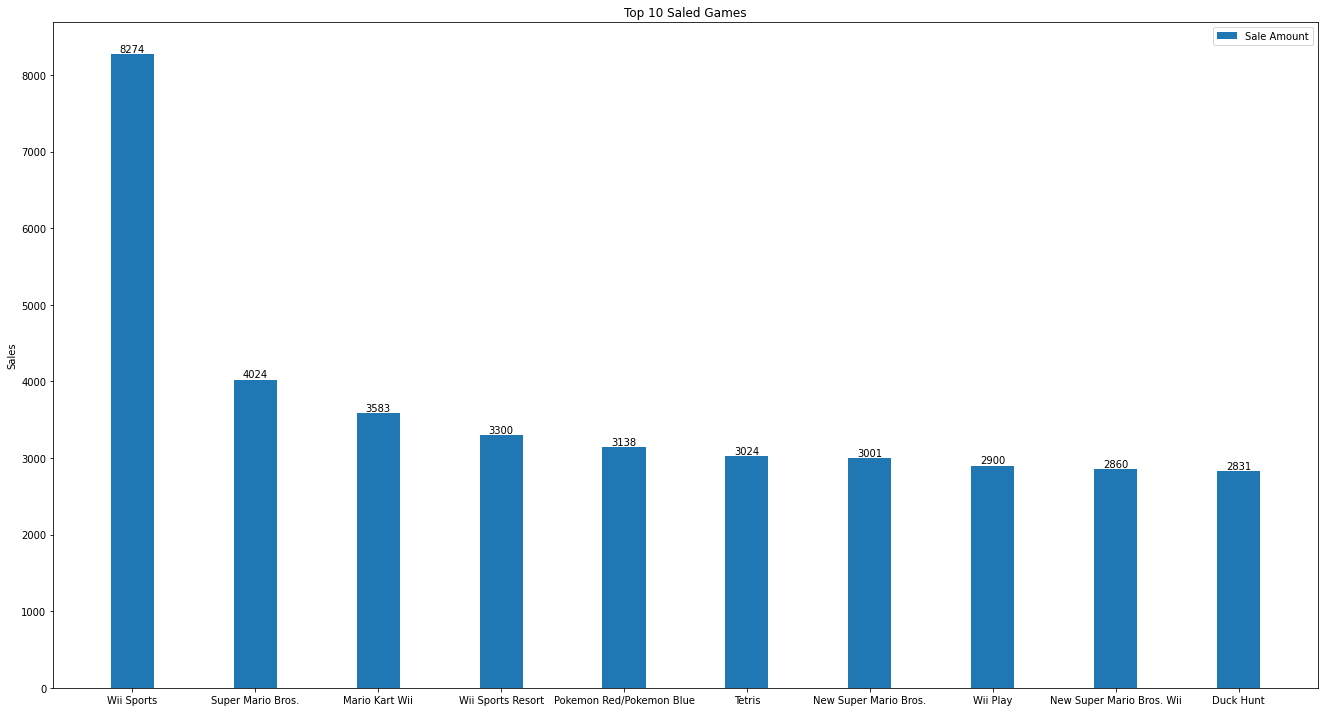

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = df_sorted.loc[0:9,['Name']]
labels = x['Name'].tolist()
Total_Sales = df_sorted.loc[0:9,['Total_Sales']]
Total_Sales = Total_Sales['Total_Sales'].tolist()
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(18.5, 10))
rects1 = ax.bar(x , Total_Sales, width, label='Sale Amount')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sales')
ax.set_title('Top 10 Saled Games')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1)
fig.tight_layout()

plt.show()

In [ ]:
df_gbPlatform = (df_sorted
                       .groupby(by='Platform')
                       .sum()
                       .sort_values(by=['Total_Sales'],axis=0,ascending=False)
                       .loc[:,['Total_Sales']]
)
df_gbPlatform.T.head()

Platform       Wii     DS   X360     GB    PS3  ...   GBA   XB   PC  2600  PSP
Total_Sales  33087  20715  18993  12866  11148  ...  2633  848  811   781  772

[1 rows x 17 columns]

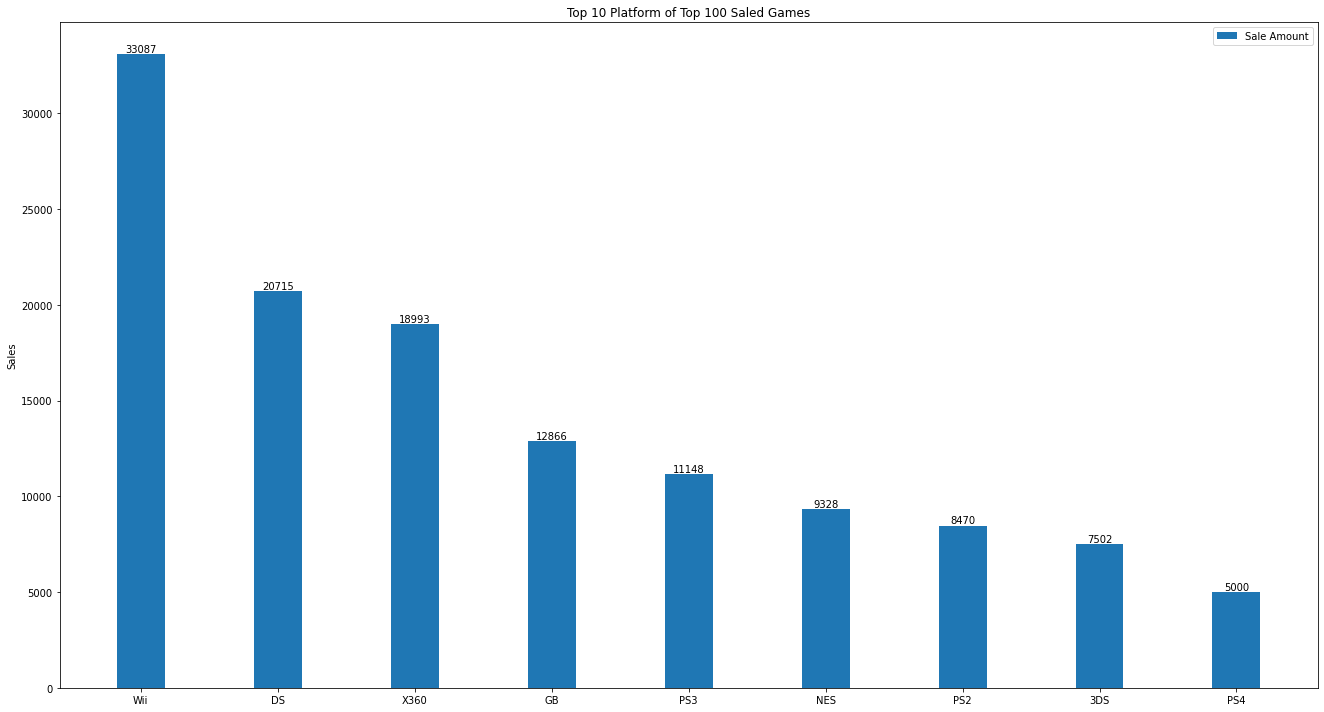

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

labels = df_gbPlatform.index.tolist()[0:9]
Total_Sales = df_gbPlatform['Total_Sales'].tolist()[0:9]
Total_Sales
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(18.5, 10))
rects1 = ax.bar(x , Total_Sales, width, label='Sale Amount')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sales')
ax.set_title('Top 10 Platform of Top 100 Saled Games')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1)
fig.tight_layout()

plt.show()

In [ ]:
df_gbGenre = (df_sorted
              .drop(df_sorted[ df_sorted['Genre'] == 0 ].index)
              .groupby(by='Genre')     
              .sum()
              .sort_values(by=['Total_Sales'],axis=0,ascending=False)
              .loc[:,['Total_Sales']]
)
df_gbGenre.T

Genre        Shooter  Platform  Role-Playing  ...  Puzzle  Fighting  Adventure
Total_Sales    25756     25190         19105  ...    5335      2048       1117

[1 rows x 11 columns]

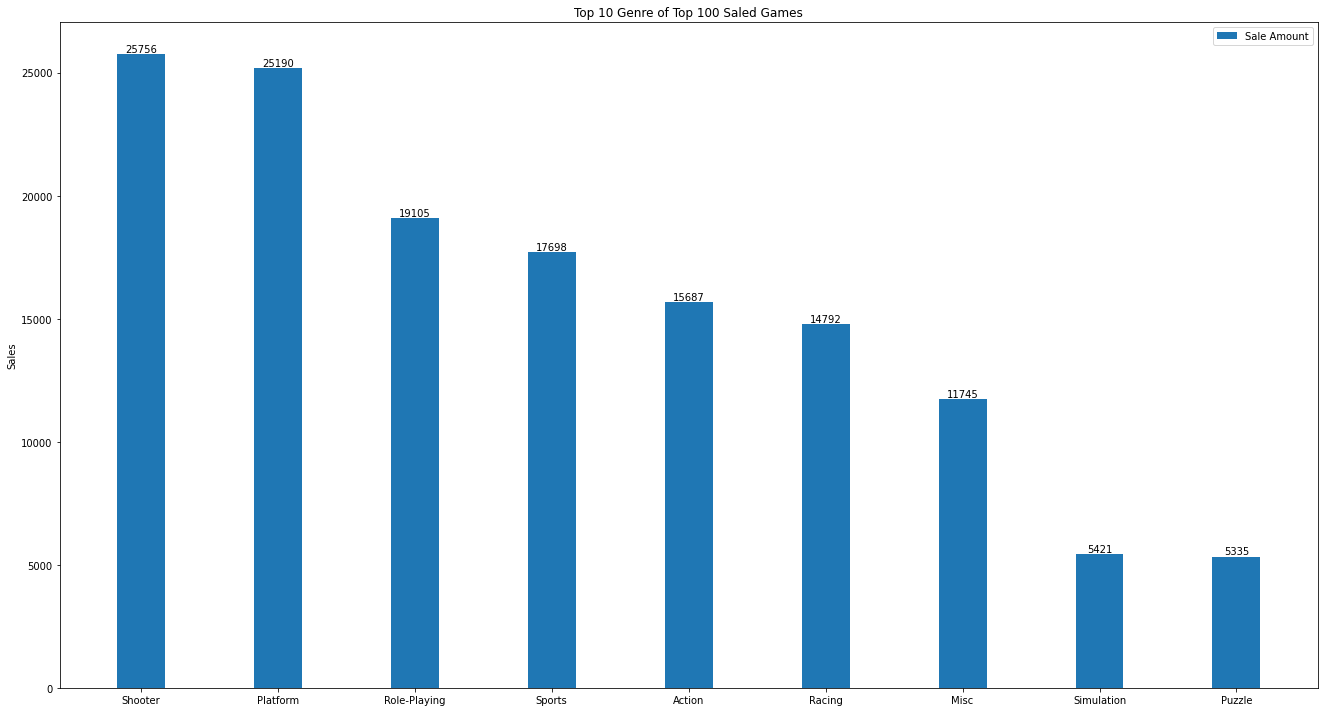

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

labels = df_gbGenre.index.tolist()[0:9]
Total_Sales = df_gbGenre['Total_Sales'].tolist()[0:9]
Total_Sales
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(18.5, 10))
rects1 = ax.bar(x , Total_Sales, width, label='Sale Amount')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sales')
ax.set_title('Top 10 Genre of Top 100 Saled Games')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1)
fig.tight_layout()

plt.show()